# Analysis On Film Success

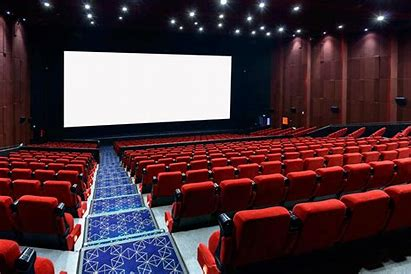

## Overview

For this project, the company that I correspond to is looking to expand their into the film industry. Seeing how so many other big companies are now creating original film content, they are looking to also get into the mix as well. However, they do not know anything about creating movies. 

## Business Problem

Explore what types of films are currently doing the best at the box office and then translate those findings into actionable insights that the head of your company's new movie studio can use to help decide what type of films to create in order to have success in this new endevour.

## Data Preparation

This project will consist of working with data from different files that include [Box Office Mojo](https://www.boxofficemojo.com/), [The Numbers](https://www.the-numbers.com/), and [IMDB](https://www.imdb.com/) that contain different information on movies in the past years including film name, rating, genre, studio, production budget, and much more.

### Examine Production Budget and Film Gross Relationship

In [1]:
# import basic packages
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
from scipy.stats.stats import pearsonr
import statsmodels.api as sm

In [2]:
# open up csv file to examine the budgets and their gross income
df_movie_budget = pd.read_csv('C:\\Users\\bryan\\Documents\\Flatiron\\phase_2\\phase_2_project\\Data\\tn.movie_budgets.csv.gz')
df_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [3]:
# retrieve basic information on data frame
df_movie_budget.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [5]:
# create function to convert production_budget and worldwide_gross into integers
def convert_revenue_columns(df, columns):
    for column in columns:
        df[column] = pd.to_numeric(df[column].str.replace('[\$,]', '', regex=True), errors='coerce')
    return df

convert_columns = ['production_budget', 'domestic_gross', 'worldwide_gross']
df_movie_budget = convert_revenue_columns(df_movie_budget, convert_columns )

In [6]:
df_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,7000,0,0
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338
5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0


In [8]:
# eliminate rows that have a 0 for the worldwide_gross column
df_movie_budget = df_movie_budget[df_movie_budget.worldwide_gross != 0]

In [9]:
df_movie_budget

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5775,76,"May 26, 2006",Cavite,7000,70071,71644
5776,77,"Dec 31, 2004",The Mongol King,7000,900,900
5778,79,"Apr 2, 1999",Following,6000,48482,240495
5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338


In [10]:
# asign variables to production budget column and world wide gross column to later plot the best fit line
x = df_movie_budget['production_budget']
y = df_movie_budget['worldwide_gross']
a, b = np.polyfit(x, y, 1)

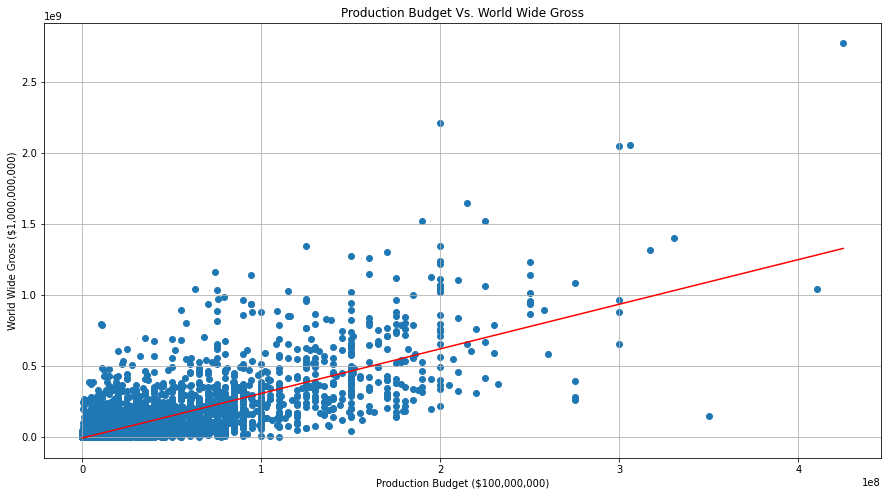

In [12]:
# plot a scatter plot to show relationship between film budget and gross including the best fit line
plt.figure(figsize=(15, 8))
plt.scatter(df_movie_budget['production_budget'], df_movie_budget['worldwide_gross'])
plt.title('Production Budget Vs. World Wide Gross')
plt.xlabel('Production Budget ($100,000,000)')
plt.ylabel('World Wide Gross ($1,000,000,000)')
plt.grid(True)
plt.plot(x, a*x+b , color = 'red') 
plt.show()

Although there seems to be a positive relationship between the budget and the world wide gross based off of the plotted points on the graph, we well need to double check by finding the correlation coefficient to confirm that it is indeep a positive correlation.

In [13]:
# find the correlation coefficient 
v1 = df_movie_budget['production_budget']
v2 = df_movie_budget['worldwide_gross']
np.corrcoef(v1, v2)

array([[1.        , 0.74601305],
       [0.74601305, 1.        ]])

In [15]:
pearsonr(v1, v2)

(0.7460130477427683, 0.0)

The correlation coefficient is 0.74, meaning that there is a strong positive correlation bewteen budget and gross

### Explore which are the most successful studios

In [17]:
# load csv file to examine the best film studios
df_movie_gross = pd.read_csv("C:\\Users\\bryan\\Documents\\Flatiron\\phase_2\\phase_2_project\\Data\\bom.movie_gross.csv.gz")
df_movie_gross

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [19]:
# get basic information on data frame
df_movie_gross.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [21]:
# get rid of null values
df_movie_gross_clean = df_movie_gross.dropna(how='any',axis=0) 
df_movie_gross_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2007 entries, 0 to 3353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2007 non-null   object 
 1   studio          2007 non-null   object 
 2   domestic_gross  2007 non-null   float64
 3   foreign_gross   2007 non-null   object 
 4   year            2007 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 94.1+ KB


In [23]:
# convert domestic and foreign gross into integer values
df_movie_gross_clean['domestic_gross'] = pd.to_numeric(df_movie_gross_clean['domestic_gross'], errors='coerce').fillna(0).astype(int)
df_movie_gross_clean['foreign_gross'] = pd.to_numeric(df_movie_gross_clean['foreign_gross'], errors='coerce').fillna(0).astype(int)


<ipython-input-23-7ee760d2007a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_gross_clean['domestic_gross'] = pd.to_numeric(df_movie_gross_clean['domestic_gross'], errors='coerce').fillna(0).astype(int)
<ipython-input-23-7ee760d2007a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_gross_clean['foreign_gross'] = pd.to_numeric(df_movie_gross_clean['foreign_gross'], errors='coerce').fillna(0).astype(int)


In [25]:
# add new column combining the domestic and foreign profits into one
df_movie_gross_clean['world_wide_gross'] = df_movie_gross_clean['domestic_gross'] + df_movie_gross_clean['foreign_gross']
df_movie_gross_clean

<ipython-input-25-9888715e3647>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movie_gross_clean['world_wide_gross'] = df_movie_gross_clean['domestic_gross'] + df_movie_gross_clean['foreign_gross']


,title,studio,domestic_gross,foreign_gross,year,world_wide_gross
0,Toy Story 3,BV,415000000,652000000,2010,1067000000
1,Alice in Wonderland (2010),BV,334200000,691300000,2010,1025500000
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000,664300000,2010,960300000
3,Inception,WB,292600000,535700000,2010,828300000
4,Shrek Forever After,P/DW,238700000,513900000,2010,752600000
...,...,...,...,...,...,...
3275,I Still See You,LGF,1400,1500000,2018,1501400
3286,The Catcher Was a Spy,IFC,725000,229000,2018,954000
3309,Time Freak,Grindstone,10000,256000,2018,266000
3342,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200,5200,2018,98400


In [27]:
# combine repeating studio names into one
df_movie_gross_clean['studio'].replace(to_replace='WB (NL)', value='WB', inplace = True)

C:\Users\bryan\anaconda3\envs\learn-env\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


In [29]:
# group data by studio and retrieve some basic numeric data from it
df_studio = df_movie_gross_clean.groupby('studio')['world_wide_gross'].agg([ np.sum, np.mean, np.max, np.min])

df_studio

,sum,mean,amax,amin
studio,,,,
3D,1.600000e+07,1.600000e+07,16000000,16000000
A24,4.989190e+08,2.625889e+07,79400000,74700
AF,4.655000e+06,2.327500e+06,4100000,555000
AGF,1.768000e+05,1.768000e+05,176800,176800
AR,5.805000e+07,5.805000e+07,58050000,58050000
...,...,...,...,...
WOW,4.940000e+04,4.940000e+04,49400,49400
Wein.,4.095903e+09,5.936091e+07,426600000,461000
Yash,2.952345e+08,4.920575e+07,88000000,104500


In [31]:
# arrange by highest studio grossing average and retrieve only the highest earning studios
df_studio_clean=df_studio.sort_values(by=['mean'], ascending = False).head(10)
df_studio_clean

,sum,mean,amax,amin
studio,,,,
HC,8.703000e+08,8.703000e+08,870300000,870300000
P/DW,5.076500e+09,5.076500e+08,1123800000,22100000
BV,4.419038e+10,4.249075e+08,1518900000,84900
GrtIndia,2.542000e+08,2.542000e+08,254200000,254200000
WB,4.110560e+10,2.362391e+08,1341500000,3495000
Fox,3.098037e+10,2.311968e+08,903600000,3933000
Sony,2.240472e+10,2.133782e+08,1108600000,2497000
Par.,1.944420e+10,2.068532e+08,1104000000,2206000
Uni.,2.974681e+10,2.065750e+08,1309500000,2349000


There seems to be studios such as "HC" and "GrtIndia" that seem to only have one film to there name because the sum, average, maximum, and minimum value of their different movies are all the same. These studios will be removed to avoid skewing the data.

In [33]:
# get rid of any studio that only has one film as part of it, as it could skew the results
df_studio_clean.drop("HC", inplace = True)
df_studio_clean.drop("GrtIndia", inplace = True)
df_studio_clean

,sum,mean,amax,amin
studio,,,,
P/DW,5.076500e+09,5.076500e+08,1123800000,22100000
BV,4.419038e+10,4.249075e+08,1518900000,84900
WB,4.110560e+10,2.362391e+08,1341500000,3495000
Fox,3.098037e+10,2.311968e+08,903600000,3933000
Sony,2.240472e+10,2.133782e+08,1108600000,2497000
Par.,1.944420e+10,2.068532e+08,1104000000,2206000
Uni.,2.974681e+10,2.065750e+08,1309500000,2349000
Sum.,2.284971e+09,1.632122e+08,712200000,7271000


In [35]:
# once again look at the basic data frame information to see how the revised data is looking
df_studio_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, P/DW to Sum.
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sum     8 non-null      float64
 1   mean    8 non-null      float64
 2   amax    8 non-null      int32  
 3   amin    8 non-null      int32  
dtypes: float64(2), int32(2)
memory usage: 256.0+ bytes


In [37]:
# convert the values in the mean column into integers 
df_studio_clean['mean'] = df_studio_clean['mean'].astype('int64')
df_studio_clean

,sum,mean,amax,amin
studio,,,,
P/DW,5.076500e+09,507650000,1123800000,22100000
BV,4.419038e+10,424907513,1518900000,84900
WB,4.110560e+10,236239097,1341500000,3495000
Fox,3.098037e+10,231196765,903600000,3933000
Sony,2.240472e+10,213378239,1108600000,2497000
Par.,1.944420e+10,206853166,1104000000,2206000
Uni.,2.974681e+10,206575041,1309500000,2349000
Sum.,2.284971e+09,163212214,712200000,7271000


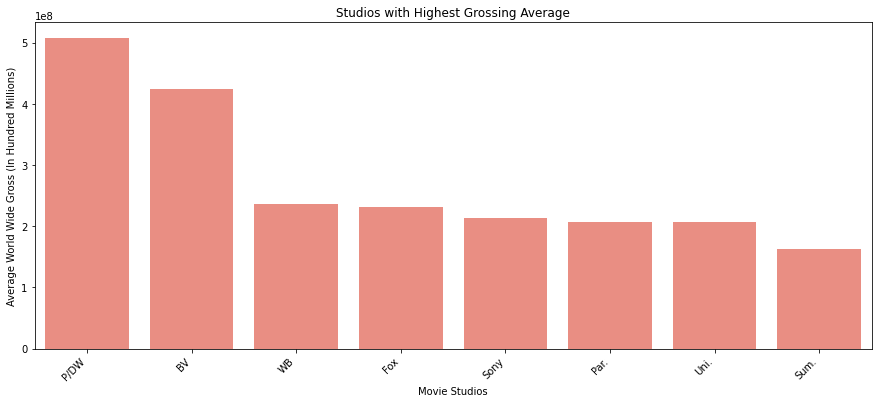

In [39]:
# plot the data frame to get a visualization of how the highest grossing studios compare to each other
plt.figure(figsize=(15, 6))
sns.barplot(x=df_studio_clean.index, y=df_studio_clean['mean'],color='salmon')
plt.ylabel('Average World Wide Gross (In Hundred Millions)')
plt.xlabel('Movie Studios')
plt.title('Studios with Highest Grossing Average')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on the results from the above graph, these seem to be the top 8 best studios to co-produce with, however, Dream Works and Buena Vista studios do seem to stand out from the rest.

### Examine Relationship Bewteen Genre and Film Rating

In [41]:
# load data from the imdb data base to what the highest rated genres are
conn = sqlite3.connect("C:\\Users\\bryan\\Documents\\Flatiron\\phase_2\\phase_2_project\\im.db")

In [43]:
# take a quick look at all the tables in the data base
pd.read_sql("""                        
SELECT * FROM sqlite_master
WHERE type='table' 
""", conn)

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


In [45]:
# take a look at the movie_baiscs table
pd.read_sql("SELECT * FROM movie_basics", conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [47]:
# take a look at the movie_rating table
pd.read_sql(" SELECT * FROM movie_ratings", conn)

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [49]:
# join the two tables together while also getting rid of null values
imdb_df = pd.read_sql("""
SELECT DISTINCT genres, primary_title, averagerating, numvotes
FROM movie_basics 
JOIN movie_ratings
   USING(movie_id)
WHERE averagerating is NOT NULL
AND genres is NOT NULL

""", conn)
imdb_df

,genres,primary_title,averagerating,numvotes
0,"Action,Crime,Drama",Sunghursh,7.0,77
1,"Biography,Drama",One Day Before the Rainy Season,7.2,43
2,Drama,The Other Side of the Wind,6.9,4517
3,"Comedy,Drama",Sabse Bada Sukh,6.1,13
4,"Comedy,Drama,Fantasy",The Wandering Soap Opera,6.5,119
...,...,...,...,...
73047,Documentary,Swarm Season,6.2,5
73048,Documentary,Diabolik sono io,6.2,6
73049,"Drama,Family",Sokagin Çocuklari,8.7,136
73050,Documentary,Albatross,8.5,8


In [51]:
# examine the basic information on this new data frame
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73052 entries, 0 to 73051
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   genres         73052 non-null  object 
 1   primary_title  73052 non-null  object 
 2   averagerating  73052 non-null  float64
 3   numvotes       73052 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [53]:
# add a space between the different genres for each film
imdb_df['genres'] = imdb_df['genres'].str.split(',') 
imdb_df

,genres,primary_title,averagerating,numvotes
0,"[Action, Crime, Drama]",Sunghursh,7.0,77
1,"[Biography, Drama]",One Day Before the Rainy Season,7.2,43
2,[Drama],The Other Side of the Wind,6.9,4517
3,"[Comedy, Drama]",Sabse Bada Sukh,6.1,13
4,"[Comedy, Drama, Fantasy]",The Wandering Soap Opera,6.5,119
...,...,...,...,...
73047,[Documentary],Swarm Season,6.2,5
73048,[Documentary],Diabolik sono io,6.2,6
73049,"[Drama, Family]",Sokagin Çocuklari,8.7,136
73050,[Documentary],Albatross,8.5,8


In [55]:
# edit data frame so that there is only one genre per row 
imdb_df = imdb_df.explode('genres')
imdb_df

,genres,primary_title,averagerating,numvotes
0,Action,Sunghursh,7.0,77
0,Crime,Sunghursh,7.0,77
0,Drama,Sunghursh,7.0,77
1,Biography,One Day Before the Rainy Season,7.2,43
1,Drama,One Day Before the Rainy Season,7.2,43
...,...,...,...,...
73048,Documentary,Diabolik sono io,6.2,6
73049,Drama,Sokagin Çocuklari,8.7,136
73049,Family,Sokagin Çocuklari,8.7,136
73050,Documentary,Albatross,8.5,8


In [56]:
# group data frame by genres and find the average rating for each genre
df_genres = imdb_df.groupby('genres').agg({'averagerating': 'mean', 'numvotes': 'sum'})
df_genres

,averagerating,numvotes
genres,,
Action,5.810361,101161682
Adult,3.766667,164
Adventure,6.196201,84232589
Animation,6.248308,15353302
Biography,7.162274,21609446
Comedy,6.002689,74305805
Crime,6.115441,39631356
Documentary,7.332090,4739345
Drama,6.401559,119567500


There seems to be outliers that could negatively impact the results. Genres such as "short" and "reality-tv" seem to have significantly less number of votes, meanings that less people watched those types of films. With that in consideration, any genre that has less than 10,000 votes will be getting dropped.

In [58]:
# drop any genre that has significantly less number of votes
df_genres.drop("Adult", inplace = True)
df_genres.drop("Game-Show", inplace = True)
df_genres.drop("Reality-TV", inplace = True)
df_genres.drop("Short", inplace = True)

In [59]:
df_genres

,averagerating,numvotes
genres,,
Action,5.810361,101161682
Adventure,6.196201,84232589
Animation,6.248308,15353302
Biography,7.162274,21609446
Comedy,6.002689,74305805
Crime,6.115441,39631356
Documentary,7.332090,4739345
Drama,6.401559,119567500
Family,6.394725,8636710


In [60]:
# order data frame my genres with the highest average score
df_genres_clean = df_genres.sort_values(by=['averagerating'], ascending = False)

In [61]:
df_genres_clean

,averagerating,numvotes
genres,,
Documentary,7.332090,4739345
News,7.271330,123319
Biography,7.162274,21609446
Music,7.091972,5453369
History,7.040956,7843349
Sport,6.961493,3755824
War,6.584291,2684725
Musical,6.498336,1387965
Drama,6.401559,119567500


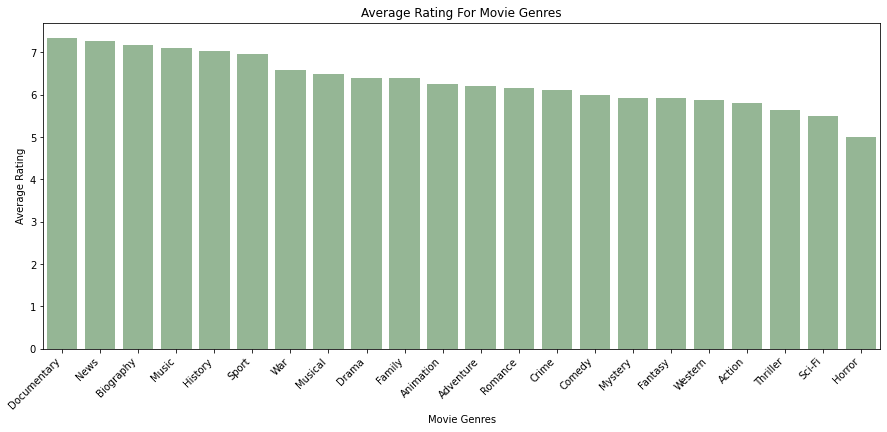

In [63]:
# plot the differnt genres in a bar chart to see how the average rating compares between genres
plt.figure(figsize=(15, 6))
sns.barplot(x=df_genres_clean.index, y=df_genres_clean['averagerating'],color='darkseagreen')
plt.ylabel('Average Rating')
plt.xlabel('Movie Genres')
plt.title('Average Rating For Movie Genres')
plt.xticks(rotation=45, ha='right')
plt.show()

Based on this graph, horror films seem to recieve the worst audience score in general out of all genres.

## Results

After this extensive exploration we can conclude a few things from the data at hand. The first is that there seems to be a strong positive correlation between the production budget and a film's overall gross. Secondly, it appears that the movie studios with the most success are Dream Works, Buena Vista, and Warner Bros. Lastly, we can see that viewers tend to give documentary and bio-pic style of movies a higher overall rating in comparison to genres such as horror.

## Conclusion 

From the results that were found one can suggest to their fellow stakeholders that moving forward to take these things into consideration:

-It is safe to assume that the more you spend on a film, the higher the overall earnings will be. With that said we can state that the higher the risk (production budget), the higher the reward (world wide gross).

-Seeing that collaboration in film making is very common in  the industry, the studios that should be taken into consideration for co-production are Dream Works, Buena Vista, and Warner Bros.

-Based on the results from the study into different genres, we can see that documentary style and bio-pic type of movies tend to be the genres with the highest overall satisfaction rating from the views, so we could say that those genres are the safer option when it comes to viewer satisfaction. While horror is the riskiest genre to get right as it seems to be the genre with the overall lowest viewer rating.

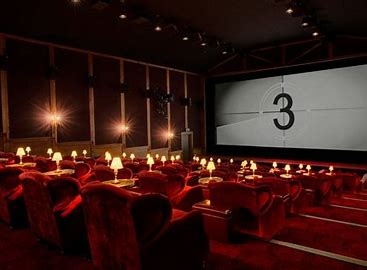